<a href="https://www.kaggle.com/code/kparthiban007/cluster-analysis?scriptVersionId=211204952" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style = "Padding:25px; color:#FF8C00; font-size:40px; border-radius:25px; text-align:center; background-color:#FFEBCD; ">Cluster Analysis</div>

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading Data as a Pandas DataFrame
df = pd.read_csv("/kaggle/input/fish-species-sampling-weight-and-height-data/fish_data.csv")
df.head(5)

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


In [3]:
# Information about the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


In [4]:
# Checking For Null values
df.isnull().sum()

species      0
length       0
weight       0
w_l_ratio    0
dtype: int64

In [5]:
# Checking For Duplicate Values
df.duplicated().sum()

109

In [6]:
df = df.drop_duplicates()
#df.duplicated().sum()

In [7]:
df.describe()

,length,weight,w_l_ratio
count,3971.000000,3971.000000,3971.000000
mean,17.337076,3.728947,0.252110
std,7.066382,1.030543,0.122636
min,6.360000,2.050000,0.080000
25%,11.360000,3.070000,0.170000
50%,17.360000,3.310000,0.190000
75%,22.535000,4.090000,0.340000
max,33.860000,6.290000,0.640000


In [8]:
print(f"Dimension of the Data : {df.shape}")

Dimension of the Data : (3971, 4)


In [9]:
x = df.drop(columns =['species'])
y= df['species']

In [10]:
len(df['species'].value_counts())

9

In [11]:
z_score = pd.DataFrame(stats.zscore(x))

print("Z-Scores")
display(z_score.describe().round(3))

Z-Scores


,length,weight,w_l_ratio
count,3971.000,3971.000,3971.000
mean,-0.000,-0.000,-0.000
std,1.000,1.000,1.000
min,-1.554,-1.629,-1.404
25%,-0.846,-0.639,-0.670
50%,0.003,-0.407,-0.507
75%,0.736,0.350,0.717
max,2.339,2.485,3.163


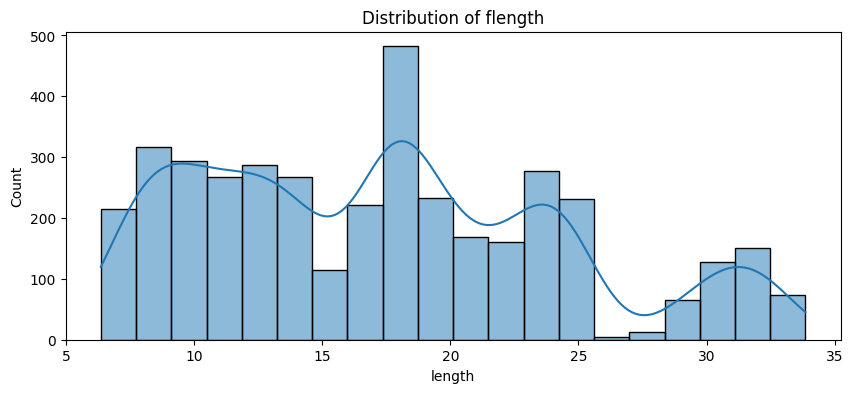

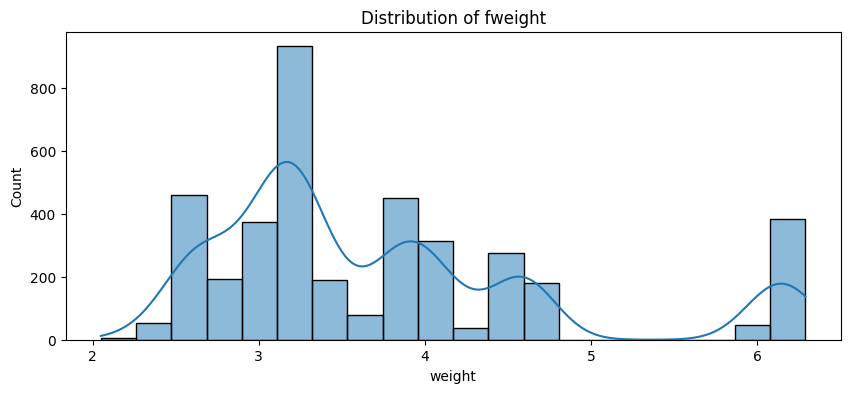

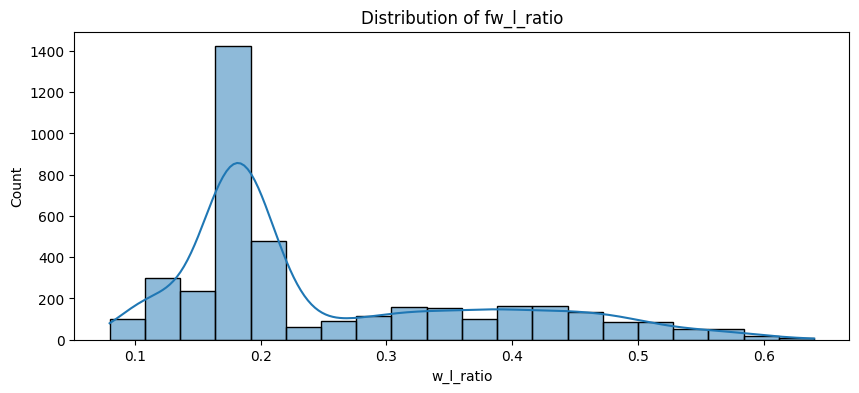

In [12]:
for col in x:
    plt.figure(figsize=(10,4))
    sns.histplot(data =df,x=col,kde =True,bins=20)
    plt.title(f"Distribution of f{col}")
    plt.show()

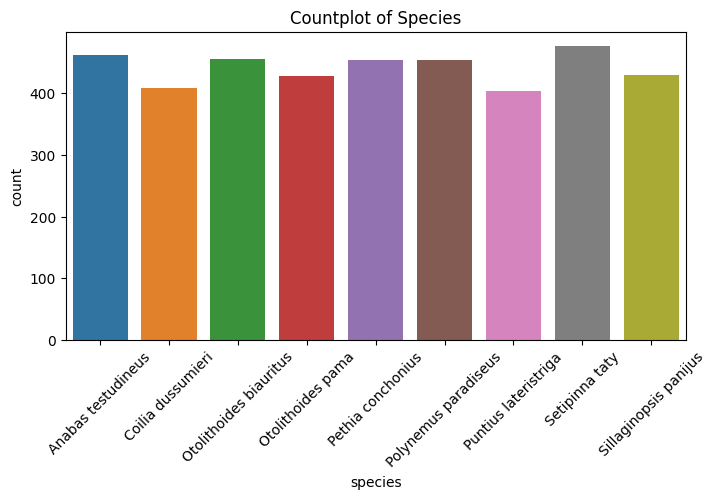

In [13]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='species')
plt.title(f'Countplot of Species')
plt.xticks(rotation=45)

plt.show()

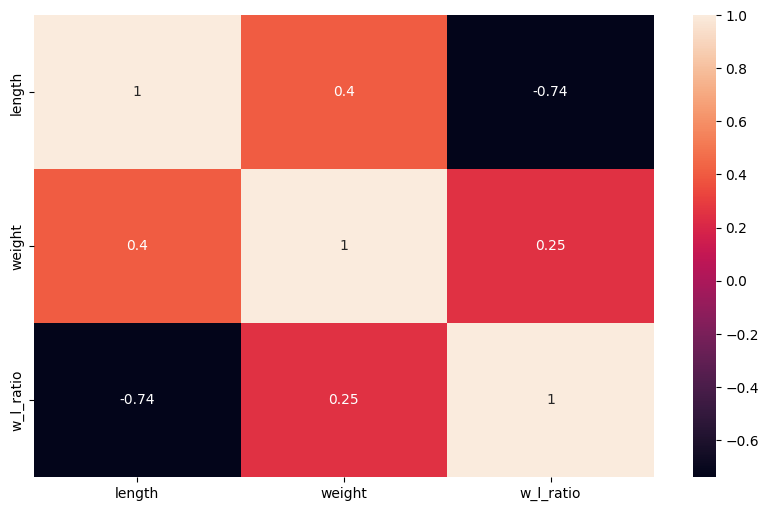

In [14]:
corr_df= x.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_scaled = scaler.fit_transform(x)

x_transformed = scaler.inverse_transform(x_scaled)

pd.DataFrame(x_transformed, columns=x.columns).head()

,length,weight,w_l_ratio
0,10.66,3.45,0.32
1,6.91,3.27,0.47
2,8.38,3.46,0.41
3,7.57,3.36,0.44
4,10.83,3.38,0.31


In [16]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN


<div style = "Padding:25px; color:#FF8C00; font-size:40px; border-radius:25px; text-align:center; background-color:#FFEBCD; ">K Means</div>

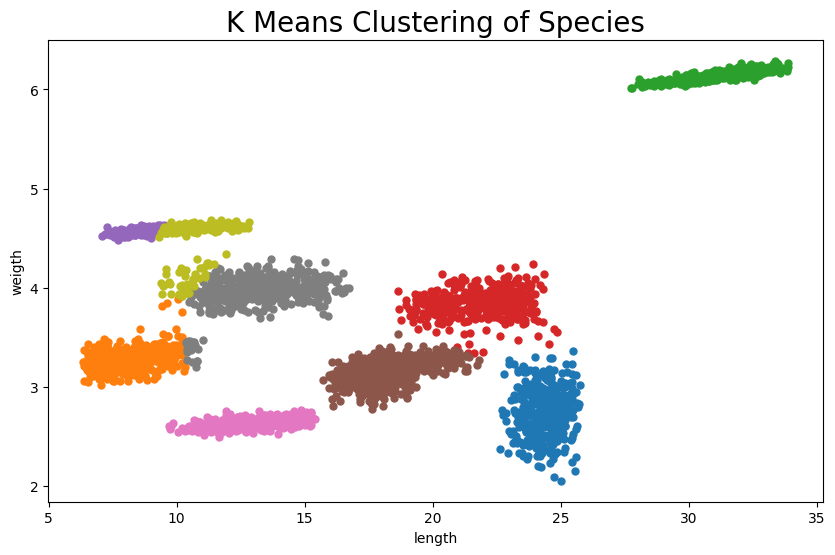

In [17]:

Kmeans = KMeans(n_clusters = 9,max_iter =100)

y_kmeans = Kmeans.fit_predict(x_scaled)

plt.figure(figsize= (10,6))

for i in range(9):
    plt.scatter(x_transformed[y_kmeans == i, 0], x_transformed[y_kmeans == i, 1], s=25)

plt.title('K Means Clustering of Species', fontsize=20)
plt.xlabel('length')
plt.ylabel('weigth')

plt.show()

<div style = "Padding:25px; color:#FF8C00; font-size:40px; border-radius:25px; text-align:center; background-color:#FFEBCD; ">Hierarchical Clustering</div>

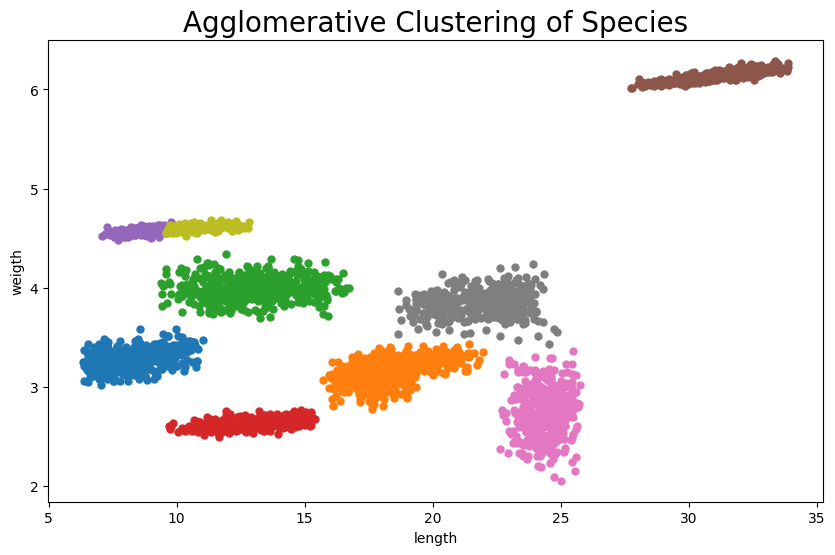

In [18]:
agg_clustering = AgglomerativeClustering(n_clusters=9)

y_agg = agg_clustering.fit_predict(x_scaled)


plt.figure(figsize= (10,6))

for i in range(9):
    plt.scatter(x_transformed[y_agg == i, 0], x_transformed[y_agg == i, 1], s=25)

plt.title('Agglomerative Clustering of Species', fontsize=20)
plt.xlabel('length')
plt.ylabel('weigth')

plt.show()

<div style = "Padding:25px; color:#FF8C00; font-size:40px; border-radius:25px; text-align:center; background-color:#FFEBCD; ">DBSCAN</div>

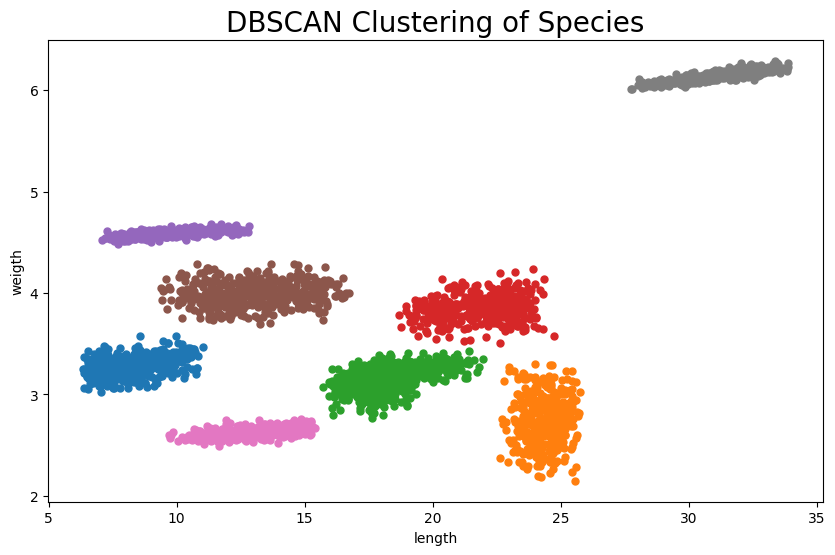

In [19]:
dbscan = DBSCAN(eps=0.03, min_samples=5)

y_dbscan = dbscan.fit_predict(x_scaled)

plt.figure(figsize= (10,6))

for i in range(9):
    plt.scatter(x_transformed[y_dbscan == i, 0], x_transformed[y_dbscan == i, 1], s=25)

plt.title('DBSCAN Clustering of Species', fontsize=20)
plt.xlabel('length')
plt.ylabel('weigth')

plt.show()

<div style = "Padding:25px; color:#FF8C00; font-size:40px; border-radius:25px; text-align:center; background-color:#FFEBCD; ">True Clusters</div>

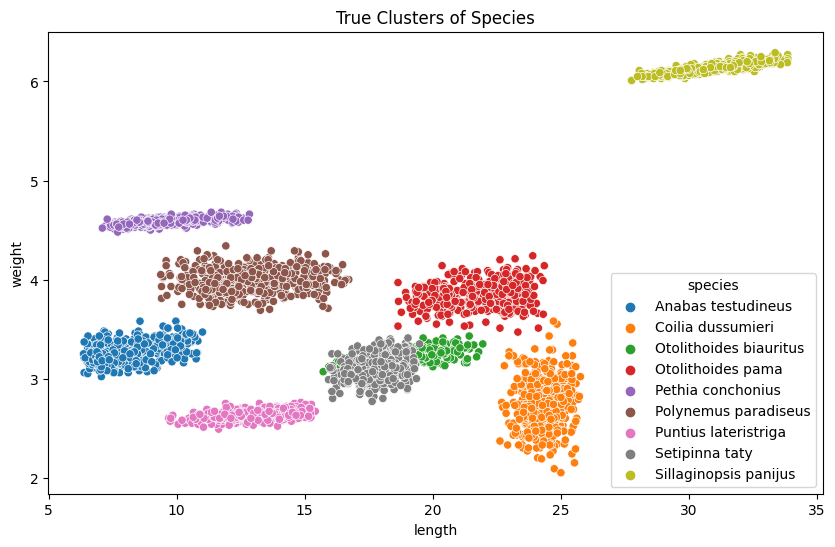

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data =df,x='length' ,y ='weight',hue=df['species'])
plt.title('True Clusters of Species')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()